In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from IPython.display import display

In [ ]:
#Getting our Data
chunksize = 10 ** 6
path = "C:/Users/abidm/Desktop/Projet_2/Data"
files = [file for file in os.listdir(path)] 
dest_path = "C:/Users/abidm/Desktop/Projet_2/Actes"

for file in files:
    _list = []
    for chunk in pd.read_csv(path+"/"+file, chunksize=chunksize, sep=";"):
        mask=(chunk["PRS_NAT"]==3211) | (chunk["PRS_NAT"]==3212)| (chunk["PRS_NAT"]==3213)| (chunk["PRS_NAT"]==3214)
        extraction=chunk[mask]
        _list.append(extraction)
    actes = pd.concat(_list)    
    actes.to_csv(dest_path+"/Actes_"+file, index=False,sep=";")

In [ ]:
#one-year concatetation
path = "C:/Users/abidm/Desktop/Projet_2/Actes"
files = [file for file in os.listdir(path)] 
_list = []

for file in files: 
    csv=pd.read_csv(path+"/"+file , sep=";")
    _list.append(csv)
    
actes = pd.concat(_list)    
actes.to_csv(path+"/Actes_18.csv", index=False,sep=";")

In [ ]:
#loading data
data_actes= pd.read_csv("C:/Users/abidm/Desktop/Projet_2/Actes/Actes_18.csv",sep=";")
df=data_actes.copy() 
df.drop(['Unnamed: 55'],axis=1,inplace=True)

In [ ]:
df

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,ETE_CAT_SNDS,ETE_REG_COD,...,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG
0,201801,11,80,76,9,1,2,0,9999,99,...,30,3,0,1,76,0,1,1,8,9
1,201801,11,50,75,9,1,1,0,9999,99,...,30,3,0,9,99,0,0,99,9,9
2,201801,5,30,5,9,2,2,0,9999,99,...,30,3,0,9,11,0,1,1,9,9
3,201801,11,60,32,9,1,1,0,9999,99,...,30,3,0,9,32,0,1,2,9,9
4,201801,76,80,76,9,1,1,0,9999,99,...,30,3,0,9,76,0,1,1,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13868965,201812,11,60,93,9,1,2,0,9999,99,...,30,3,0,9,93,0,1,15,9,9
13868966,201812,99,40,24,9,2,2,0,9999,99,...,30,3,0,1,24,0,1,1,1,9
13868967,201812,84,70,84,9,2,1,0,9999,99,...,30,3,0,1,84,0,1,1,8,9
13868968,201812,99,30,32,9,2,2,0,9999,99,...,30,3,0,9,32,0,1,1,9,9


In [ ]:
#Putting NANs
dict_1st={"AGE_BEN_SNDS":99,"ASU_NAT":99,"ATT_NAT":9,"BEN_CMU_TOP":9,"BEN_QLT_COD":9,"BEN_RES_REG":99,"BEN_SEX_COD":9,"CPL_COD":888,"CPT_ENV_TYP":9,"DDP_SPE_COD":0,"DRG_AFF_NAT":99,"ETE_CAT_SNDS":9999,"ETE_IND_TAA":9,"ETE_REG_COD":99,"ETE_TYP_SNDS":99,
           "ETP_CAT_SNDS":9999,"ETP_REG_COD":99,"EXE_INS_REG":99,"EXO_MTF":99,"FLT_ACT_COG":np.nan,"FLT_ACT_NBR":np.nan,"FLT_ACT_QTE":np.nan,"FLT_DEP_MNT":np.nan,"FLT_PAI_MNT":np.nan,"FLT_REM_MNT":np.nan,"FLX_ANN_MOI":np.nan,"MDT_TYP_COD":9,"MFT_COD":99,"MTM_NAT":9,"ORG_CLE_REG":99,
           "PRE_INS_REG":99,"PRS_ACT_COG":np.nan,"PRS_ACT_NBR":np.nan,"PRS_ACT_QTE":np.nan,"PRS_DEP_MNT":np.nan,"PRS_FJH_TYP":8,"PRS_NAT":9999,"PRS_PAI_MNT":np.nan,"PRS_PDS_QCP":0,"PRS_PPU_SEC":np.nan,"PRS_REM_BSE":np.nan,"PRS_REM_MNT":np.nan,"PRS_REM_TAU":np.nan,"PRS_REM_TYP":99,"PSE_ACT_CAT":99,
           "PSE_ACT_SNDS":0,"PSE_SPE_SNDS":0,"PSE_STJ_SNDS":9,"PSP_ACT_CAT":99,"PSP_ACT_SNDS":0,"PSP_SPE_SNDS":0,"PSP_STJ_SNDS":9,"SOI_ANN":0,"SOI_MOI":0,"TOP_PS5_TRG":9}
for column,cleared in dict_1st.items():
    df.loc[df[column]==cleared,column]=np.nan

dict_2nd={"PSE_ACT_SNDS":99,"PSE_SPE_SNDS":99,"SOI_ANN":1,"ATT_NAT":0,"DDP_SPE_COD":121, #,"EXO_MTF":0 not discarded
           "MTM_NAT":0,"PSP_ACT_SNDS":99,"PSP_SPE_SNDS":99}
for column,cleared in dict_2nd.items():
    df.loc[df[column]==cleared,column]=np.nan

In [ ]:
# #Plotting NANs
# plt.figure(figsize=(20,10))
# sns.heatmap(df.isna(),cbar=False)
df

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,ETE_CAT_SNDS,ETE_REG_COD,...,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG
0,201801.0,11.0,80.0,76.0,NaN,1.0,2.0,NaN,NaN,NaN,...,30.0,3.0,NaN,1.0,76.0,NaN,1.0,1.0,8.0,NaN
1,201801.0,11.0,50.0,75.0,NaN,1.0,1.0,NaN,NaN,NaN,...,30.0,3.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,201801.0,5.0,30.0,5.0,NaN,2.0,2.0,NaN,NaN,NaN,...,30.0,3.0,NaN,NaN,11.0,NaN,1.0,1.0,NaN,NaN
3,201801.0,11.0,60.0,32.0,NaN,1.0,1.0,NaN,NaN,NaN,...,30.0,3.0,NaN,NaN,32.0,NaN,1.0,2.0,NaN,NaN
4,201801.0,76.0,80.0,76.0,NaN,1.0,1.0,NaN,NaN,NaN,...,30.0,3.0,NaN,NaN,76.0,NaN,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13868965,201812.0,11.0,60.0,93.0,NaN,1.0,2.0,NaN,NaN,NaN,...,30.0,3.0,NaN,NaN,93.0,NaN,1.0,15.0,NaN,NaN
13868966,201812.0,NaN,40.0,24.0,NaN,2.0,2.0,NaN,NaN,NaN,...,30.0,3.0,NaN,1.0,24.0,NaN,1.0,1.0,1.0,NaN
13868967,201812.0,84.0,70.0,84.0,NaN,2.0,1.0,NaN,NaN,NaN,...,30.0,3.0,NaN,1.0,84.0,NaN,1.0,1.0,8.0,NaN
13868968,201812.0,NaN,30.0,32.0,NaN,2.0,2.0,NaN,NaN,NaN,...,30.0,3.0,NaN,NaN,32.0,NaN,1.0,1.0,NaN,NaN


In [ ]:
#fixing types manually
keep=['PRS_ACT_COG', 'PRS_ACT_NBR','PRS_DEP_MNT','PRS_PAI_MNT','PRS_REM_BSE','PRS_REM_MNT','FLT_ACT_COG','FLT_ACT_NBR','FLT_PAI_MNT','FLT_DEP_MNT','FLT_REM_MNT','PRS_REM_TAU']
to_change = [item for item in list(df.columns) if item not in keep]
for col in to_change:
    df[col] = df[col].astype('Int64')
df.dtypes


FLX_ANN_MOI       Int64
ORG_CLE_REG       Int64
AGE_BEN_SNDS      Int64
BEN_RES_REG       Int64
BEN_CMU_TOP       Int64
BEN_QLT_COD       Int64
BEN_SEX_COD       Int64
DDP_SPE_COD       Int64
ETE_CAT_SNDS      Int64
ETE_REG_COD       Int64
ETE_TYP_SNDS      Int64
ETP_REG_COD       Int64
ETP_CAT_SNDS      Int64
MDT_TYP_COD       Int64
MFT_COD           Int64
PRS_FJH_TYP       Int64
PRS_ACT_COG     float64
PRS_ACT_NBR     float64
PRS_ACT_QTE       Int64
PRS_DEP_MNT     float64
PRS_PAI_MNT     float64
PRS_REM_BSE     float64
PRS_REM_MNT     float64
FLT_ACT_COG     float64
FLT_ACT_NBR     float64
FLT_ACT_QTE       Int64
FLT_PAI_MNT     float64
FLT_DEP_MNT     float64
FLT_REM_MNT     float64
SOI_ANN           Int64
SOI_MOI           Int64
ASU_NAT           Int64
ATT_NAT           Int64
CPL_COD           Int64
CPT_ENV_TYP       Int64
DRG_AFF_NAT       Int64
ETE_IND_TAA       Int64
EXO_MTF           Int64
MTM_NAT           Int64
PRS_NAT           Int64
PRS_PPU_SEC       Int64
PRS_REM_TAU     

In [ ]:
#missingvalues_percentage
mv_prc=df.isna().sum(axis=0)/df.shape[0]*100
mv_prc.sort_values(ascending=False)

ATT_NAT         100.000000
PSE_SPE_SNDS     99.999928
PSP_ACT_SNDS     97.783130
DDP_SPE_COD      97.368875
MTM_NAT          96.543622
MDT_TYP_COD      93.269457
MFT_COD          78.031772
ETE_CAT_SNDS     77.911820
ETE_TYP_SNDS     77.873822
ETE_IND_TAA      77.873822
ETE_REG_COD      77.873822
ETP_CAT_SNDS     54.131489
ETP_REG_COD      53.591391
PRE_INS_REG      47.659401
EXO_MTF          39.264343
CPT_ENV_TYP      39.264055
BEN_CMU_TOP      39.264055
TOP_PS5_TRG      39.264055
DRG_AFF_NAT      39.264055
PRS_REM_TYP      39.264055
PSP_STJ_SNDS     20.967895
PSE_STJ_SNDS     19.516215
PRS_ACT_NBR      19.478303
FLT_ACT_NBR      18.210552
PRS_FJH_TYP      18.158234
EXE_INS_REG      11.744679
PSP_SPE_SNDS     11.366525
ORG_CLE_REG      11.109751
BEN_RES_REG       5.721795
PSE_ACT_SNDS      2.472347
AGE_BEN_SNDS      0.132418
PRS_PDS_QCP       0.038647
PSP_ACT_CAT       0.000461
PSE_ACT_CAT       0.000043
BEN_QLT_COD       0.000043
ASU_NAT           0.000029
BEN_SEX_COD       0.000000
P

In [ ]:
df = df[df.columns[mv_prc<90]]

In [ ]:
df #Prob:all columns are floats

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,ETE_CAT_SNDS,ETE_REG_COD,ETE_TYP_SNDS,...,PRS_PDS_QCP,EXE_INS_REG,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG
0,201801,11,80,76,<NA>,1,2,<NA>,<NA>,<NA>,...,31,76,30,3,1,76,1,1,8,<NA>
1,201801,11,50,75,<NA>,1,1,<NA>,<NA>,<NA>,...,31,75,30,3,<NA>,<NA>,0,<NA>,<NA>,<NA>
2,201801,5,30,5,<NA>,2,2,<NA>,<NA>,<NA>,...,31,11,30,3,<NA>,11,1,1,<NA>,<NA>
3,201801,11,60,32,<NA>,1,1,<NA>,<NA>,<NA>,...,31,32,30,3,<NA>,32,1,2,<NA>,<NA>
4,201801,76,80,76,<NA>,1,1,<NA>,<NA>,<NA>,...,31,11,30,3,<NA>,76,1,1,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13868965,201812,11,60,93,<NA>,1,2,<NA>,<NA>,<NA>,...,31,93,30,3,<NA>,93,1,15,<NA>,<NA>
13868966,201812,<NA>,40,24,<NA>,2,2,<NA>,<NA>,<NA>,...,31,27,30,3,1,24,1,1,1,<NA>
13868967,201812,84,70,84,<NA>,2,1,<NA>,<NA>,<NA>,...,31,84,30,3,1,84,1,1,8,<NA>
13868968,201812,<NA>,30,32,<NA>,2,2,<NA>,<NA>,<NA>,...,31,32,30,3,<NA>,32,1,1,<NA>,<NA>


In [ ]:
smpl_fst_lst=pd.concat([df.head(100000),df.tail(100000)])

In [ ]:
smpl_fst_lst

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,ETE_CAT_SNDS,ETE_REG_COD,ETE_TYP_SNDS,...,PRS_PDS_QCP,EXE_INS_REG,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG
0,201801,11,80,76,<NA>,1,2,<NA>,<NA>,<NA>,...,31,76,30,3,1,76,1,1,8,<NA>
1,201801,11,50,75,<NA>,1,1,<NA>,<NA>,<NA>,...,31,75,30,3,<NA>,<NA>,0,<NA>,<NA>,<NA>
2,201801,5,30,5,<NA>,2,2,<NA>,<NA>,<NA>,...,31,11,30,3,<NA>,11,1,1,<NA>,<NA>
3,201801,11,60,32,<NA>,1,1,<NA>,<NA>,<NA>,...,31,32,30,3,<NA>,32,1,2,<NA>,<NA>
4,201801,76,80,76,<NA>,1,1,<NA>,<NA>,<NA>,...,31,11,30,3,<NA>,76,1,1,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13868965,201812,11,60,93,<NA>,1,2,<NA>,<NA>,<NA>,...,31,93,30,3,<NA>,93,1,15,<NA>,<NA>
13868966,201812,<NA>,40,24,<NA>,2,2,<NA>,<NA>,<NA>,...,31,27,30,3,1,24,1,1,1,<NA>
13868967,201812,84,70,84,<NA>,2,1,<NA>,<NA>,<NA>,...,31,84,30,3,1,84,1,1,8,<NA>
13868968,201812,<NA>,30,32,<NA>,2,2,<NA>,<NA>,<NA>,...,31,32,30,3,<NA>,32,1,1,<NA>,<NA>


In [ ]:
mv_smpl=smpl_fst_lst.isna().sum(axis=0)/smpl_fst_lst.shape[0]*100
mv_prc=df.isna().sum(axis=0)/df.shape[0]*100
print(mv_smpl.sort_values(ascending=False),"\n",mv_prc.sort_values(ascending=False))

MFT_COD         76.5345
ETE_CAT_SNDS    76.4180
ETE_IND_TAA     76.3835
ETE_TYP_SNDS    76.3835
ETE_REG_COD     76.3835
ETP_CAT_SNDS    53.5560
ETP_REG_COD     53.0030
PRE_INS_REG     48.3060
EXO_MTF         38.6865
BEN_CMU_TOP     38.6860
CPT_ENV_TYP     38.6860
DRG_AFF_NAT     38.6860
TOP_PS5_TRG     38.6860
PRS_REM_TYP     38.6860
PSP_STJ_SNDS    20.9510
PSE_STJ_SNDS    19.4775
PRS_ACT_NBR     19.4430
PRS_FJH_TYP     18.1660
FLT_ACT_NBR     18.1405
EXE_INS_REG     12.9845
PSP_SPE_SNDS    11.3560
ORG_CLE_REG     11.1785
BEN_RES_REG      5.6545
PSE_ACT_SNDS     2.7215
AGE_BEN_SNDS     0.1295
PRS_PDS_QCP      0.0705
PSP_ACT_CAT      0.0005
BEN_QLT_COD      0.0005
BEN_SEX_COD      0.0000
PRS_ACT_QTE      0.0000
PRS_ACT_COG      0.0000
FLT_PAI_MNT      0.0000
PRS_DEP_MNT      0.0000
SOI_MOI          0.0000
PSE_ACT_CAT      0.0000
PRS_REM_TAU      0.0000
PRS_PPU_SEC      0.0000
PRS_NAT          0.0000
CPL_COD          0.0000
ASU_NAT          0.0000
SOI_ANN          0.0000
PRS_PAI_MNT     

<AxesSubplot:>

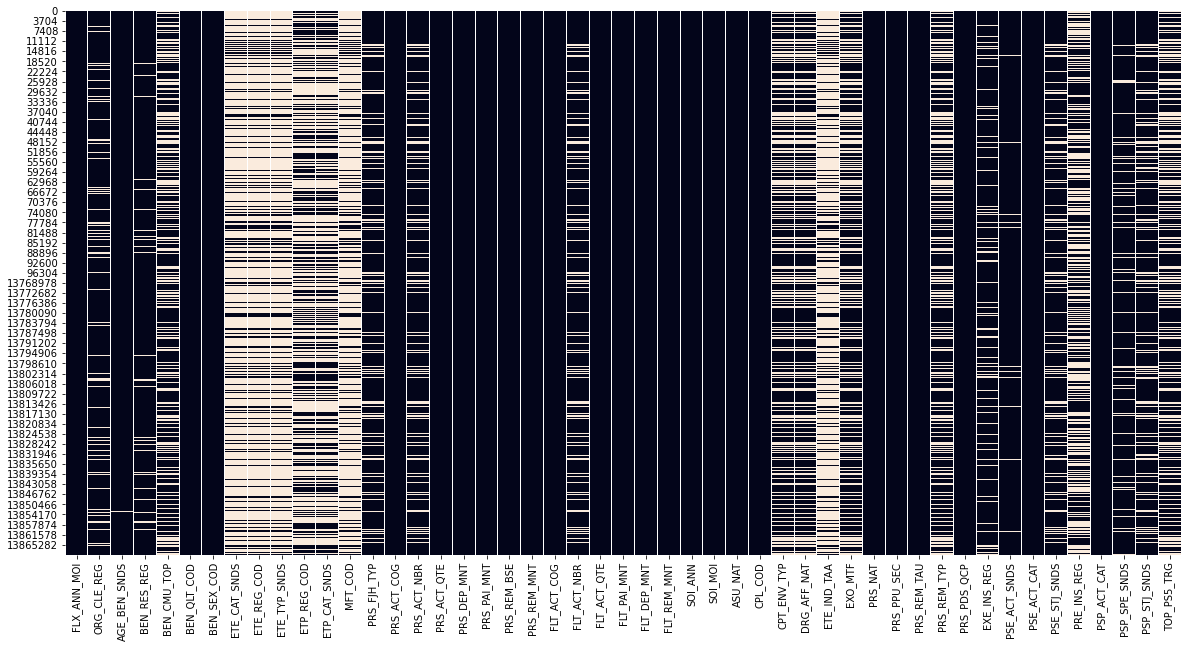

In [ ]:
#Plotting NANs
plt.figure(figsize=(20,10))
sns.heatmap(smpl_fst_lst.isna(),cbar=False)

In [ ]:
pd.set_option('display.max_columns', None)

dealing with 70% and ~50%

In [ ]:
smpl_fst_lst.head(15)[['ETE_REG_COD','EXE_INS_REG','PSE_ACT_CAT','ETE_CAT_SNDS','ETE_TYP_SNDS','PSE_ACT_SNDS','ETE_IND_TAA','PRS_PPU_SEC']]

,ETE_REG_COD,EXE_INS_REG,PSE_ACT_CAT,ETE_CAT_SNDS,ETE_TYP_SNDS,PSE_ACT_SNDS,ETE_IND_TAA,PRS_PPU_SEC
0,<NA>,76,3,<NA>,<NA>,30,<NA>,2
1,<NA>,75,3,<NA>,<NA>,30,<NA>,2
2,<NA>,11,3,<NA>,<NA>,30,<NA>,2
3,<NA>,32,3,<NA>,<NA>,30,<NA>,2
4,<NA>,11,3,<NA>,<NA>,30,<NA>,2
5,<NA>,75,3,<NA>,<NA>,30,<NA>,2
6,84,<NA>,0,1110,2,30,0,1
7,<NA>,24,3,<NA>,<NA>,30,<NA>,2
8,<NA>,11,3,<NA>,<NA>,30,<NA>,2
9,<NA>,11,3,<NA>,<NA>,30,<NA>,2


In [ ]:
#rq you give time series as input so mask on rows, list--> mask on columns
smpl_fst_lst[~smpl_fst_lst['ETE_REG_COD'].isnull()].head(20)[['ETE_REG_COD','EXE_INS_REG','PSE_ACT_CAT','ETE_CAT_SNDS','ETE_TYP_SNDS','PSE_ACT_SNDS','ETE_IND_TAA','PRS_PPU_SEC']]

,ETE_REG_COD,EXE_INS_REG,PSE_ACT_CAT,ETE_CAT_SNDS,ETE_TYP_SNDS,PSE_ACT_SNDS,ETE_IND_TAA,PRS_PPU_SEC
6,84,<NA>,0,1110,2,30,0,1
11,28,28,3,1110,4,30,2,2
14,11,<NA>,3,2206,6,30,0,2
21,28,<NA>,0,1102,1,30,1,1
27,44,44,3,1107,6,30,0,2
30,32,<NA>,0,1102,1,30,0,1
41,52,52,3,1110,4,30,2,2
43,75,<NA>,0,1102,1,30,0,1
49,76,<NA>,0,1102,1,30,1,1
50,75,75,3,1110,4,30,0,2


In [ ]:
#Imputing 'EXE_INS_REG' using 'ETE_REG_COD'
# tab_df=smpl_fst_lst[~smpl_fst_lst['ETE_REG_COD'].isnull() & ~smpl_fst_lst['EXE_INS_REG'].isnull()]
# (tab_df['EXE_INS_REG']==tab_df['ETE_REG_COD']).value_counts()# err=2%
mask=smpl_fst_lst['EXE_INS_REG'].isnull() & (~smpl_fst_lst['ETE_REG_COD'].isnull())
smpl_fst_lst['EXE_INS_REG'][mask]=smpl_fst_lst['ETE_REG_COD'][mask]
#r no more missing values in EXE_INS_REG

In [ ]:
smpl_fst_lst.drop(['ETE_REG_COD'],axis=1,inplace=True) #dropping 'ETE_REG_COD'
#smpl_fst_lst.drop(['ETE_TYP_SNDS'],axis=1,inplace=True) # dropped cause nearly same info as 'PRS_PPU_SEC' don't

Remark: 
for 'PSE_ACT_CAT' and 'PSE_ACT_SNDS', impute one with another cause nearly same info
fo EXO_MTF, 0 should be NANed ain't sure it's useful column, like preceded analysed not discarded ones ETE_IND_TAA ETE_CAT_SNDS

In [ ]:
tab_df=smpl_fst_lst[(~smpl_fst_lst['ETP_CAT_SNDS'].isnull())&(~smpl_fst_lst['ETE_CAT_SNDS'].isnull())][['ETP_CAT_SNDS','ETE_CAT_SNDS']]
(tab_df['ETP_CAT_SNDS']==tab_df['ETE_CAT_SNDS']).value_counts()# err=0.2%
mask=smpl_fst_lst['ETP_CAT_SNDS'].isnull() & (~smpl_fst_lst['ETE_CAT_SNDS'].isnull())
smpl_fst_lst['ETP_CAT_SNDS'][mask]=smpl_fst_lst['ETE_CAT_SNDS'][mask]
#r missing values reduced to 44% in 'ETP_CAT_SNDS'

In [ ]:
smpl_fst_lst.drop(['ETE_CAT_SNDS'],axis=1,inplace=True) #dropping 'ETE_REG_COD'

In [ ]:
smpl_fst_lst.head(10)[['ETP_REG_COD','PRE_INS_REG','EXE_INS_REG','BEN_RES_REG','ORG_CLE_REG']]

,ETP_REG_COD,PRE_INS_REG,EXE_INS_REG,BEN_RES_REG,ORG_CLE_REG
0,<NA>,76,76,76,11
1,75,<NA>,75,75,11
2,<NA>,11,11,5,5
3,<NA>,32,32,32,11
4,<NA>,76,11,76,76
5,<NA>,75,75,75,75
6,84,<NA>,84,84,84
7,<NA>,53,24,24,11
8,11,<NA>,11,5,11
9,<NA>,11,11,11,11


In [ ]:
# tab_df=smpl_fst_lst[(~smpl_fst_lst['ETP_REG_COD'].isnull())&(~smpl_fst_lst['PRE_INS_REG'].isnull())][['PRE_INS_REG','ETP_REG_COD']]
# (tab_df['ETP_REG_COD']==tab_df['PRE_INS_REG']).value_counts()#err=0.5%
mask=(smpl_fst_lst['PRE_INS_REG'].isnull())&(~smpl_fst_lst['ETP_REG_COD'].isnull())
smpl_fst_lst['PRE_INS_REG'][mask]=smpl_fst_lst['ETP_REG_COD'][mask]
#r missing values reduced to 2% in 'PRE_INS_REG'

In [ ]:
smpl_fst_lst.drop(['ETP_REG_COD'],axis=1,inplace=True) #dropping 'ETP_REG_COD'  

dealing with 38% ,not dealt yet actually,just some visualization done,more insights of variables needed

In [ ]:
smpl_fst_lst[~smpl_fst_lst['EXO_MTF'].isnull()].head(10)[['EXO_MTF','BEN_CMU_TOP','CPT_ENV_TYP','DRG_AFF_NAT','TOP_PS5_TRG','PRS_REM_TYP']]

,EXO_MTF,BEN_CMU_TOP,CPT_ENV_TYP,DRG_AFF_NAT,TOP_PS5_TRG,PRS_REM_TYP
37,41,0,1,35,1,0
38,41,1,1,36,1,0
41,30,0,1,35,1,0
79,10,0,1,35,1,0
81,20,0,1,35,1,0
100,20,0,1,35,1,0
102,0,0,1,35,1,0
106,0,1,7,36,0,5
110,0,0,1,35,1,0
111,42,0,1,35,1,0


In [ ]:
pd.crosstab(smpl_fst_lst['BEN_CMU_TOP'], smpl_fst_lst['DRG_AFF_NAT'])#'DRG_AFF_NAT'==>'BEN_CMU_TOP'
pd.crosstab(smpl_fst_lst['CPT_ENV_TYP'], smpl_fst_lst['TOP_PS5_TRG'])#'CPT_ENV_TYP'==>'TOP_PS5_TRG'
pd.crosstab(smpl_fst_lst['CPT_ENV_TYP'], smpl_fst_lst['PRS_REM_TYP'])#'CPT_ENV_TYP'==>'PRS_REM_TYP' & ~inv==True
pd.crosstab(smpl_fst_lst['TOP_PS5_TRG'], smpl_fst_lst['PRS_REM_TYP'])#'TOP_PS5_TRG'=='PRS_REM_TYP'
pd.crosstab(smpl_fst_lst['DRG_AFF_NAT'], smpl_fst_lst['TOP_PS5_TRG']) 

TOP_PS5_TRG,0,1
DRG_AFF_NAT,,
11,43,3468
12,0,13
14,0,2
15,1,1
16,0,36
17,0,18
18,0,1
31,0,3
35,1299,98012


dealing with 20%, further reviews needed

In [ ]:
smpl_fst_lst[~smpl_fst_lst['PSP_STJ_SNDS'].isnull()].head(10)[['PSP_STJ_SNDS','PSE_STJ_SNDS','PRS_ACT_NBR','PRS_FJH_TYP','FLT_ACT_NBR']]

,PSP_STJ_SNDS,PSE_STJ_SNDS,PRS_ACT_NBR,PRS_FJH_TYP,FLT_ACT_NBR
0,8,1,3.0,0,3.0
6,2,2,11.0,0,11.0
7,1,1,17.0,0,17.0
8,2,1,15.0,0,15.0
10,1,1,3.0,0,3.0
11,1,1,9.0,0,9.0
12,2,1,1.0,0,1.0
15,1,1,5.0,0,5.0
16,2,1,5.0,0,5.0
17,1,1,1.0,0,1.0


In [ ]:
smpl_fst_lst.drop(['PRS_FJH_TYP'],axis=1,inplace=True)#dropping 'PRS_FJH_TYP' cause constant column

In [ ]:
mv_smpl=smpl_fst_lst.isna().sum(axis=0)/smpl_fst_lst.shape[0]*100
mv_smpl.sort_values(ascending=False)

MFT_COD         76.5345
ETE_TYP_SNDS    76.3835
ETE_IND_TAA     76.3835
ETP_CAT_SNDS    44.6145
EXO_MTF         38.6865
PRS_REM_TYP     38.6860
CPT_ENV_TYP     38.6860
DRG_AFF_NAT     38.6860
BEN_CMU_TOP     38.6860
TOP_PS5_TRG     38.6860
PSP_STJ_SNDS    20.9510
PSE_STJ_SNDS    19.4775
PRS_ACT_NBR     19.4430
FLT_ACT_NBR     18.1405
PSP_SPE_SNDS    11.3560
ORG_CLE_REG     11.1785
BEN_RES_REG      5.6545
PSE_ACT_SNDS     2.7215
PRE_INS_REG      2.1530
AGE_BEN_SNDS     0.1295
PRS_PDS_QCP      0.0705
PSP_ACT_CAT      0.0005
BEN_QLT_COD      0.0005
BEN_SEX_COD      0.0000
PRS_ACT_COG      0.0000
PRS_REM_BSE      0.0000
PRS_ACT_QTE      0.0000
PRS_DEP_MNT      0.0000
PRS_PAI_MNT      0.0000
FLT_REM_MNT      0.0000
PRS_REM_MNT      0.0000
FLT_ACT_COG      0.0000
FLT_ACT_QTE      0.0000
FLT_PAI_MNT      0.0000
FLT_DEP_MNT      0.0000
SOI_ANN          0.0000
SOI_MOI          0.0000
ASU_NAT          0.0000
CPL_COD          0.0000
PRS_NAT          0.0000
PRS_PPU_SEC      0.0000
PRS_REM_TAU     

'PSE_ACT_SNDS' constant to be treated
PRS_NAT ASU_NAT 
BEN_CMU_TOP CPT_ENV_TYP CPL_COD EXO_MTF
PRS_FJH_TYP
PSE_STJ_SNDS  PSP_STJ_SNDS
PRS_PDS_QCP

DRG_AFF_NAT < BEN_QLT_COD ==>not causal
ORG_CLE_REG BEN_RES_REG EXE_INS_REG PRE_INS_REG ETP_REG_COD #ETE_REG_COD ==>not causal + 11 is vip +on va choisir EXE_INS_REG
PSE_ACT_CAT PSE_ACT_SNDS ETE_TYP_SNDS  ==>PSE_ACT_SNDS  and  ETP_CAT_SNDS to discard
& PSP_ACT_CAT PSP_ACT_SNDS ETP_CAT_SNDS PSP_SPE_SNDS PSP_SPE_SNDS USELESS CAUSE prescriptor

then see indicateurs...


In [ ]:
#info of hopital or labo lost when ETE_CAT_SNDS discarded so ETP_CAT_SNDS is useless
verify=pd.concat([df.head(100000),df.tail(100000)])
display(pd.crosstab(verify['PSE_ACT_CAT'], verify['ETE_CAT_SNDS'])) 
display(pd.crosstab(smpl_fst_lst['PSE_ACT_CAT'], smpl_fst_lst['ETP_CAT_SNDS'])) 

ETE_CAT_SNDS,1101,1102,1103,1104,1106,1107,1109,1110,1111,1201,1203,1205,2100,2201,2202,2206,3401
PSE_ACT_CAT,,,,,,,,,,,,,,,,,
0,8824,12581,46,818,20,5,0,1548,9,4,24,95,134,28,21,959,733
3,10,2,4,0,0,1537,1,17989,1031,0,451,0,235,0,1,25,29


ETP_CAT_SNDS,1101,1102,1103,1104,1106,1107,1109,1110,1111,1112,1113,1114,1201,1203,1205,2100,2103,2201,2202,2206,3401,3402,4101,4102,4103,4104,4105,4106,4301,4302,4303,4401,4402,4501,4603,4604,4605,4606
PSE_ACT_CAT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,8895,12581,46,818,20,5,0,1558,9,0,0,0,4,28,95,134,0,32,22,951,720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18555,20187,1449,2611,350,3044,63,25676,1427,77,16,98,77,1326,1063,1100,2,2065,962,3205,120,1,125,14,37,8,1,76,196,5,14,637,14,12,56,182,1,1


In [ ]:
full_rows=((smpl_fst_lst.isnull().sum(axis=1).sort_values())==0)
smpl_fst_lst[full_rows].head()
# mask=(~(smpl_fst_lst['BEN_RES_REG']==11))&(~(smpl_fst_lst['EXE_INS_REG']==11))
smpl_fst_lst.head(20)[['PSE_ACT_CAT', 'PSE_ACT_SNDS', 'ETE_TYP_SNDS']]
pd.crosstab(smpl_fst_lst['PSE_ACT_CAT'],smpl_fst_lst['PSE_SPE_SNDS']) 

<ipython-input-119-c3aafc52e09f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  smpl_fst_lst[full_rows].head()


KeyError: 'PSE_SPE_SNDS'

In [ ]:
#dropping Prescriptor variables and some othrs
smpl_fst_lst.drop(['PSP_ACT_CAT','PSP_SPE_SNDS','PRE_INS_REG','PSP_STJ_SNDS','ETP_CAT_SNDS'],axis=1,inplace=True)
smpl_fst_lst.drop(['ORG_CLE_REG'],axis=1,inplace=True)
smpl_fst_lst.drop(['PSE_ACT_SNDS'],axis=1,inplace=True)

In [ ]:
mv_smpl=smpl_fst_lst.isna().sum(axis=0)/smpl_fst_lst.shape[0]*100
mv_smpl.sort_values(ascending=False) #now we got 38 columns

MFT_COD         76.5345
ETE_TYP_SNDS    76.3835
ETE_IND_TAA     76.3835
EXO_MTF         38.6865
TOP_PS5_TRG     38.6860
CPT_ENV_TYP     38.6860
DRG_AFF_NAT     38.6860
BEN_CMU_TOP     38.6860
PRS_REM_TYP     38.6860
PSE_STJ_SNDS    19.4775
PRS_ACT_NBR     19.4430
FLT_ACT_NBR     18.1405
BEN_RES_REG      5.6545
AGE_BEN_SNDS     0.1295
PRS_PDS_QCP      0.0705
BEN_QLT_COD      0.0005
BEN_SEX_COD      0.0000
PRS_REM_MNT      0.0000
PRS_ACT_COG      0.0000
PRS_ACT_QTE      0.0000
PRS_DEP_MNT      0.0000
PRS_PAI_MNT      0.0000
PRS_REM_BSE      0.0000
FLT_PAI_MNT      0.0000
FLT_ACT_COG      0.0000
FLT_ACT_QTE      0.0000
FLT_DEP_MNT      0.0000
FLT_REM_MNT      0.0000
SOI_ANN          0.0000
SOI_MOI          0.0000
ASU_NAT          0.0000
CPL_COD          0.0000
PRS_NAT          0.0000
PRS_PPU_SEC      0.0000
PRS_REM_TAU      0.0000
EXE_INS_REG      0.0000
PSE_ACT_CAT      0.0000
FLX_ANN_MOI      0.0000
dtype: float64

In [ ]:
smpl_fst_lst['PRS_ACT_NBR'].value_counts()
(smpl_fst_lst['FLT_ACT_QTE']==smpl_fst_lst['PRS_ACT_QTE']).value_counts()
smpl_fst_lst[(smpl_fst_lst['FLT_ACT_QTE']==smpl_fst_lst['PRS_ACT_QTE'])][['PRS_REM_TYP']].value_counts()
(smpl_fst_lst[smpl_fst_lst['PRS_REM_TYP']!=0][['PRS_ACT_QTE','FLT_ACT_QTE','PRS_ACT_NBR','FLT_ACT_NBR']]['FLT_ACT_QTE']!=0).value_counts()
(smpl_fst_lst[smpl_fst_lst['PRS_REM_TYP']==0][['PRS_ACT_QTE','FLT_ACT_QTE','PRS_ACT_NBR','FLT_ACT_NBR']]['FLT_ACT_NBR']!=smpl_fst_lst[smpl_fst_lst['PRS_REM_TYP']==0][['PRS_ACT_QTE','FLT_ACT_QTE','PRS_ACT_NBR','FLT_ACT_NBR']]['PRS_ACT_NBR']).value_counts()
(smpl_fst_lst['PRS_REM_TYP']==1).value_counts() 

False    122628
Name: PRS_REM_TYP, dtype: Int64

In [ ]:
#excel reorganised columns
smpl_fst_lst.iloc[[10]]
cols=smpl_fst_lst.columns.tolist()
# display(cols)
cols=[cols[0]]+cols[-17:-15]+ [cols[1]]+[cols[5]] +[cols[-6]]+cols[8:21]
display(cols)
smpl_fst_lst[cols].to_csv("C:/Users/abidm/Desktop/Projet_2/Head_Tail_18.csv", index=False,sep=";")

['FLX_ANN_MOI',
 'SOI_ANN',
 'SOI_MOI',
 'AGE_BEN_SNDS',
 'BEN_SEX_COD',
 'PRS_REM_TYP',
 'PRS_ACT_COG',
 'PRS_ACT_NBR',
 'PRS_ACT_QTE',
 'PRS_DEP_MNT',
 'PRS_PAI_MNT',
 'PRS_REM_BSE',
 'PRS_REM_MNT',
 'FLT_ACT_COG',
 'FLT_ACT_NBR',
 'FLT_ACT_QTE',
 'FLT_PAI_MNT',
 'FLT_DEP_MNT',
 'FLT_REM_MNT']

In [ ]:
smpl_fst_lst[cols].head(10)

,FLX_ANN_MOI,SOI_ANN,SOI_MOI,AGE_BEN_SNDS,BEN_SEX_COD,PRS_REM_TYP,PRS_ACT_COG,PRS_ACT_NBR,PRS_ACT_QTE,PRS_DEP_MNT,PRS_PAI_MNT,PRS_REM_BSE,PRS_REM_MNT,FLT_ACT_COG,FLT_ACT_NBR,FLT_ACT_QTE,FLT_PAI_MNT,FLT_DEP_MNT,FLT_REM_MNT
0,201801,2017,12,80,2,<NA>,76.0,3.0,1,0.0,20.52,20.52,20.52,76.0,3.0,1,20.52,0.0,20.52
1,201801,2017,10,50,1,<NA>,620.0,NaN,1,0.0,167.40,167.40,167.40,620.0,NaN,1,167.40,0.0,167.40
2,201801,2017,10,30,2,<NA>,56.0,NaN,1,0.0,15.12,15.12,9.07,56.0,NaN,1,15.12,0.0,9.07
3,201801,2017,12,60,1,<NA>,53.0,NaN,1,0.0,14.31,14.31,14.31,53.0,NaN,1,14.31,0.0,14.31
4,201801,2017,11,80,1,<NA>,40.0,NaN,1,0.0,10.80,10.80,10.80,40.0,NaN,1,10.80,0.0,10.80
5,201801,2017,12,20,2,<NA>,106.0,NaN,1,0.0,28.62,28.62,17.17,106.0,NaN,1,28.62,0.0,17.17
6,201801,2017,12,20,1,<NA>,249.0,11.0,1,0.0,13.45,13.45,0.00,249.0,11.0,1,13.45,0.0,0.00
7,201801,2018,1,50,2,<NA>,355.0,17.0,1,0.0,95.85,95.85,57.51,355.0,17.0,1,95.85,0.0,57.51
8,201801,2017,12,70,1,<NA>,147.0,15.0,1,0.0,39.69,39.69,39.69,147.0,15.0,1,39.69,0.0,39.69
9,201801,2017,11,80,2,<NA>,138.0,NaN,1,0.0,37.27,37.27,22.36,138.0,NaN,1,37.27,0.0,22.36


In [ ]:
mask=(smpl_fst_lst['FLX_ANN_MOI']==201801)&(smpl_fst_lst['SOI_ANN']==2017)&(smpl_fst_lst['SOI_MOI']==10)&(smpl_fst_lst['AGE_BEN_SNDS']==20)&(smpl_fst_lst['PRS_PAI_MNT']==20.52)
smpl_fst_lst[mask]

,FLX_ANN_MOI,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,ETE_TYP_SNDS,MFT_COD,PRS_ACT_COG,PRS_ACT_NBR,PRS_ACT_QTE,PRS_DEP_MNT,PRS_PAI_MNT,PRS_REM_BSE,PRS_REM_MNT,FLT_ACT_COG,FLT_ACT_NBR,FLT_ACT_QTE,FLT_PAI_MNT,FLT_DEP_MNT,FLT_REM_MNT,SOI_ANN,SOI_MOI,ASU_NAT,CPL_COD,CPT_ENV_TYP,DRG_AFF_NAT,ETE_IND_TAA,EXO_MTF,PRS_NAT,PRS_PPU_SEC,PRS_REM_TAU,PRS_REM_TYP,PRS_PDS_QCP,EXE_INS_REG,PSE_ACT_CAT,PSE_STJ_SNDS,TOP_PS5_TRG
13459,201801,20,84,0,1,2,<NA>,<NA>,76.0,3.0,2,0.0,20.52,20.52,20.52,76.0,3.0,2,20.52,0.0,20.52,2017,10,10,0,1,35,<NA>,62,3211,2,100.0,0,31,24,3,1,1
33027,201801,20,76,1,1,2,<NA>,<NA>,76.0,3.0,2,0.0,20.52,20.52,12.31,76.0,3.0,2,20.52,0.0,12.31,2017,10,10,0,1,36,<NA>,62,3211,2,60.0,0,31,76,3,1,1
54141,201801,20,76,1,1,2,<NA>,<NA>,76.0,3.0,2,0.0,20.52,0.00,6.16,0.0,0.0,0,0.00,0.0,0.00,2017,10,10,0,8,36,<NA>,62,3211,2,30.0,4,31,76,3,1,1


In [ ]:
(df['PRS_REM_TYP']==1).value_counts()

False    8423450
Name: PRS_REM_TYP, dtype: Int64

some of 2019 to treat REM_TYP==1

In [ ]:
df_19=pd.read_csv("C:/Users/abidm/Desktop/Projet_2/A2019_12.csv",sep=";",nrows=200000) #del df_19   to be done

In [ ]:
(df_19['PRS_REM_TYP']==1).value_counts() #=1% of total population
mask=(df_19['FLX_ANN_MOI']==201912)&(df_19['SOI_ANN']==2019)&(df_19['SOI_MOI']==11)&(df_19['AGE_BEN_SNDS']==50)&(df_19['PRS_NAT']==3111)&(df_19['PRS_NAT']==3111)&(df_19['BEN_RES_REG']==44)&(df_19['ORG_CLE_REG']==11)
display(df_19[df_19['PRS_REM_TYP']==1][mask])#38.10 178.25 56.05 69.90 63.30 63.30
display(df_19[df_19['PRS_REM_TYP']!=1][mask])

<ipython-input-286-08528d2b6008>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_19[df_19['PRS_REM_TYP']==1][mask])#38.10 178.25 56.05 69.90 63.30 63.30


,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,ETE_CAT_SNDS,ETE_REG_COD,ETE_TYP_SNDS,ETP_REG_COD,ETP_CAT_SNDS,MDT_TYP_COD,MFT_COD,PRS_FJH_TYP,PRS_ACT_COG,PRS_ACT_NBR,PRS_ACT_QTE,PRS_DEP_MNT,PRS_PAI_MNT,PRS_REM_BSE,PRS_REM_MNT,FLT_ACT_COG,FLT_ACT_NBR,FLT_ACT_QTE,FLT_PAI_MNT,FLT_DEP_MNT,FLT_REM_MNT,SOI_ANN,SOI_MOI,ASU_NAT,ATT_NAT,CPL_COD,CPT_ENV_TYP,DRG_AFF_NAT,ETE_IND_TAA,EXO_MTF,MTM_NAT,PRS_NAT,PRS_PPU_SEC,PRS_REM_TAU,PRS_REM_TYP,PRS_PDS_QCP,EXE_INS_REG,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG,Unnamed: 55
175601,201912,11,50,44,0,1,1,121,9999,99,99,44,1103,9,99,8,6.0,NaN,6,0.0,69.9,51.0,51.0,0.0,0.0,0,0.0,0.0,51.0,2019,11,10,0,2,1,35,9,42,0,3111,2,100.0,1,31,44,24,6,0,9,99,0,0,0,9,1,NaN


<ipython-input-286-08528d2b6008>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_19[df_19['PRS_REM_TYP']!=1][mask])


,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,ETE_CAT_SNDS,ETE_REG_COD,ETE_TYP_SNDS,ETP_REG_COD,ETP_CAT_SNDS,MDT_TYP_COD,MFT_COD,PRS_FJH_TYP,PRS_ACT_COG,PRS_ACT_NBR,PRS_ACT_QTE,PRS_DEP_MNT,PRS_PAI_MNT,PRS_REM_BSE,PRS_REM_MNT,FLT_ACT_COG,FLT_ACT_NBR,FLT_ACT_QTE,FLT_PAI_MNT,FLT_DEP_MNT,FLT_REM_MNT,SOI_ANN,SOI_MOI,ASU_NAT,ATT_NAT,CPL_COD,CPT_ENV_TYP,DRG_AFF_NAT,ETE_IND_TAA,EXO_MTF,MTM_NAT,PRS_NAT,PRS_PPU_SEC,PRS_REM_TAU,PRS_REM_TYP,PRS_PDS_QCP,EXE_INS_REG,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG,Unnamed: 55
26958,201912,11,50,44,9,1,1,0,9999,99,99,99,9999,9,99,8,2.0,NaN,1,0.0,14.80,8.50,5.10,0.0,0.0,0,0.00,0.0,5.10,2019,11,10,0,2,9,99,9,99,9,3111,2,60.0,99,31,44,24,6,0,9,44,0,1,4,9,9,NaN
56741,201912,11,50,44,0,1,1,121,9999,99,99,99,9999,9,99,0,6.0,3.0,6,0.0,18.90,18.90,18.90,6.0,3.0,6,18.90,0.0,18.90,2019,11,10,0,0,1,35,9,42,0,3111,2,100.0,0,31,44,24,6,0,1,44,24,6,0,1,1,NaN
90333,201912,11,50,44,9,1,1,0,9999,99,99,99,9999,9,99,8,1.5,NaN,1,0.0,4.73,4.73,2.84,1.5,NaN,1,4.73,0.0,2.84,2019,11,10,0,0,9,99,9,99,9,3111,2,60.0,99,31,44,30,3,0,9,44,0,1,4,9,9,NaN
122102,201912,11,50,44,9,1,1,0,2206,44,6,99,9999,9,36,0,2.0,1.0,1,0.0,14.80,8.50,5.10,0.0,0.0,0,0.00,0.0,5.10,2019,11,10,0,2,9,99,0,99,9,3111,2,60.0,99,31,99,24,0,0,2,44,0,1,1,1,9,NaN
174780,201912,11,50,44,9,1,1,0,9999,99,99,99,9999,9,99,0,4.5,3.0,3,0.0,14.19,14.19,14.19,4.5,3.0,3,14.19,0.0,14.19,2019,11,10,0,0,9,99,9,99,9,3111,2,100.0,99,31,44,24,3,0,1,44,0,1,1,1,9,NaN


In [ ]:
df_19['PRS_ACT_COG'].value_counts().sort_values(ascending=False).head(20)

 1.0     64733
 2.0     37398
 3.0     16617
 4.0      9880
 5.0      5808
 6.0      4904
 1.5      3406
 7.0      3205
 0.0      3055
 8.0      3031
 9.0      2266
 10.0     1985
 12.0     1706
 11.0     1431
 15.0     1345
-1.0      1230
 13.0     1139
 14.0     1079
 16.0      936
 18.0      861
Name: PRS_ACT_COG, dtype: int64

In [ ]:
df_19[['PRS_ACT_NBR','PRS_ACT_QTE','FLT_ACT_NBR','FLT_ACT_QTE']].head(20)
# (smpl_fst_lst['PRS_ACT_NBR']==smpl_fst_lst['PRS_ACT_QTE']).value_counts()
# ((smpl_fst_lst['PRS_ACT_NBR'].isnull())&(smpl_fst_lst['PRS_ACT_QTE'].isnull())).value_counts()
# (smpl_fst_lst['PRS_ACT_QTE'].isnull()).value_counts()

,PRS_ACT_NBR,PRS_ACT_QTE,FLT_ACT_NBR,FLT_ACT_QTE
0,1.0,1,1.0,1
1,NaN,1,NaN,1
2,1.0,1,1.0,1
3,1.0,1,1.0,1
4,4.0,4,4.0,4
5,NaN,5,0.0,0
6,NaN,31,NaN,31
7,NaN,4,NaN,4
8,54.0,54,54.0,54
9,4.0,4,4.0,4


In [ ]:
df_19['CPL_COD'].value_counts()
df_19['PRS_REM_TYP'].value_counts()
df_19[df_19['PRS_REM_TYP']==99].head(10)   ##
df_19[df_19['PRS_REM_MNT']<-222].head()
df_19[df_19['PRS_REM_MNT']==315.07]
df_19[df_19['PRS_REM_MNT']==1109.16]
((df_19['PRS_NAT']==3111)&(df_19['PRS_REM_TYP']==1)).value_counts()

False    198832
True       1168
dtype: int64

In [ ]:
display(smpl_fst_lst[smpl_fst_lst['PRS_REM_MNT']<-222].head())

,FLX_ANN_MOI,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,ETE_TYP_SNDS,MFT_COD,PRS_ACT_COG,PRS_ACT_NBR,PRS_ACT_QTE,PRS_DEP_MNT,PRS_PAI_MNT,PRS_REM_BSE,PRS_REM_MNT,FLT_ACT_COG,FLT_ACT_NBR,FLT_ACT_QTE,FLT_PAI_MNT,FLT_DEP_MNT,FLT_REM_MNT,SOI_ANN,SOI_MOI,ASU_NAT,CPL_COD,CPT_ENV_TYP,DRG_AFF_NAT,ETE_IND_TAA,EXO_MTF,PRS_NAT,PRS_PPU_SEC,PRS_REM_TAU,PRS_REM_TYP,PRS_PDS_QCP,EXE_INS_REG,PSE_ACT_CAT,PSE_STJ_SNDS,TOP_PS5_TRG
4582,201801,60,27,0,1,1,4,7,-1438.0,-57.0,-9,0.0,-388.26,-388.26,-310.61,-1438.0,-57.0,-9,-388.26,0.0,-310.61,2017,8,10,0,1,35,2,41,3211,2,80.0,0,31,27,3,1,1
5811,201801,20,11,<NA>,4,1,<NA>,<NA>,1800.0,NaN,1,0.0,-486.00,-486.00,-291.60,1800.0,NaN,1,-486.00,0.0,-291.60,2017,10,10,0,<NA>,<NA>,<NA>,<NA>,3211,2,60.0,<NA>,31,84,3,<NA>,<NA>
9228,201801,30,28,0,1,2,1,3,-3129.0,-17.0,-4,0.0,-844.83,-844.83,-844.83,-3129.0,-17.0,-4,-844.83,0.0,-844.83,2017,3,10,0,2,35,1,62,3211,1,100.0,0,31,28,0,2,1
11026,201801,70,44,0,1,1,4,7,-2385.0,-92.0,-19,0.0,-643.95,-643.95,-515.13,-2385.0,-92.0,-19,-643.95,0.0,-515.13,2017,7,10,0,1,35,2,41,3211,2,80.0,0,31,44,3,1,1
13320,201801,70,28,0,1,1,4,7,1422.0,NaN,6,0.0,-383.93,-383.93,-307.14,1422.0,NaN,6,-383.93,0.0,-307.14,2017,3,10,0,1,35,2,41,3211,2,80.0,0,31,11,3,<NA>,1


In [ ]:
display(df[df['PRS_REM_MNT']==-486].head())
# mask=(df['FLX_ANN_MOI']==201802)&(df['AGE_BEN_SNDS']==30)&(df['ORG_CLE_REG']==84)&(df['PRS_PAI_MNT']==486)&(df['SOI_ANN']==2017)&(df['SOI_MOI']==5)&(df['BEN_RES_REG']==84)&(df['PRS_ACT_QTE']==1)
# mask=(df['AGE_BEN_SNDS']==80)&(df['PRS_PAI_MNT']==486)&(df['SOI_ANN']==2018)&(df['SOI_MOI']==2) &(df['EXE_INS_REG']==11) 
#row 2 no match 
# mask=(df['FLX_ANN_MOI']==201805)&(df['AGE_BEN_SNDS']==20)&(df['PRS_PAI_MNT']==486)&(df['SOI_ANN']==2017)&(df['SOI_MOI']==11)
#row 3 match row 3
# mask=(df['FLX_ANN_MOI']==201805)&(df['AGE_BEN_SNDS']==30)&(df['PRS_PAI_MNT']==486)&(df['SOI_ANN']==2017)&(df['SOI_MOI']==12)
mask=(df['ORG_CLE_REG']==76)&(df['AGE_BEN_SNDS']==20)&(df['PRS_PAI_MNT']==486)&(df['SOI_ANN']==2017)&(df['SOI_MOI']==5)
df[mask]
# smpl_fst_lst[smpl_fst_lst['PRS_PAI_MNT']==486.00]

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,ETE_CAT_SNDS,ETE_REG_COD,ETE_TYP_SNDS,ETP_REG_COD,ETP_CAT_SNDS,MFT_COD,PRS_FJH_TYP,PRS_ACT_COG,PRS_ACT_NBR,PRS_ACT_QTE,PRS_DEP_MNT,PRS_PAI_MNT,PRS_REM_BSE,PRS_REM_MNT,FLT_ACT_COG,FLT_ACT_NBR,FLT_ACT_QTE,FLT_PAI_MNT,FLT_DEP_MNT,FLT_REM_MNT,SOI_ANN,SOI_MOI,ASU_NAT,CPL_COD,CPT_ENV_TYP,DRG_AFF_NAT,ETE_IND_TAA,EXO_MTF,PRS_NAT,PRS_PPU_SEC,PRS_REM_TAU,PRS_REM_TYP,PRS_PDS_QCP,EXE_INS_REG,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG
2179126,201802,84,30,84,0,1,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,-1800.0,-2.0,-1,0.0,-486.0,-486.0,-486.0,-1800.0,-2.0,-1,-486.0,0.0,-486.0,2017,5,10,0,1,35,<NA>,62,3211,2,100.0,0,31,84,30,3,1,84,1,1,8,1
4880143,201805,<NA>,80,<NA>,0,1,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,-1800.0,-2.0,-10,0.0,-486.0,-486.0,-486.0,-1800.0,-2.0,-10,-486.0,0.0,-486.0,2018,2,10,0,1,11,<NA>,62,3211,2,100.0,0,31,11,30,3,1,<NA>,1,9,1,1
4990525,201805,44,20,44,0,1,1,<NA>,<NA>,<NA>,44,1101,<NA>,0,-1800.0,-2.0,-2,0.0,-486.0,-486.0,-486.0,-1800.0,-2.0,-2,-486.0,0.0,-486.0,2017,11,10,0,1,35,<NA>,62,3211,2,100.0,0,31,84,30,3,1,<NA>,0,1,2,1
5033160,201805,27,30,27,0,1,1,<NA>,<NA>,<NA>,27,1101,<NA>,0,-1800.0,-2.0,-1,0.0,-486.0,-486.0,-486.0,-1800.0,-2.0,-1,-486.0,0.0,-486.0,2017,12,10,0,1,35,<NA>,62,3211,2,100.0,0,31,84,30,3,1,<NA>,0,1,2,1
5937768,201806,76,20,76,0,1,2,1102,76,1,76,1102,3,0,-1800.0,-4.0,-2,0.0,-486.0,-486.0,-486.0,-1800.0,-4.0,-2,-486.0,0.0,-486.0,2017,5,10,0,2,35,1,62,3211,1,100.0,0,31,<NA>,30,0,2,<NA>,0,<NA>,2,1


,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,ETE_CAT_SNDS,ETE_REG_COD,ETE_TYP_SNDS,ETP_REG_COD,ETP_CAT_SNDS,MFT_COD,PRS_FJH_TYP,PRS_ACT_COG,PRS_ACT_NBR,PRS_ACT_QTE,PRS_DEP_MNT,PRS_PAI_MNT,PRS_REM_BSE,PRS_REM_MNT,FLT_ACT_COG,FLT_ACT_NBR,FLT_ACT_QTE,FLT_PAI_MNT,FLT_DEP_MNT,FLT_REM_MNT,SOI_ANN,SOI_MOI,ASU_NAT,CPL_COD,CPT_ENV_TYP,DRG_AFF_NAT,ETE_IND_TAA,EXO_MTF,PRS_NAT,PRS_PPU_SEC,PRS_REM_TAU,PRS_REM_TYP,PRS_PDS_QCP,EXE_INS_REG,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG
646439,201801,76,20,76,1,1,2,1102,76,1,76,1102,3,0,1800.0,4.0,2,0.0,486.0,486.0,486.0,1800.0,4.0,2,486.0,0.0,486.0,2017,5,10,0,2,35,1,62,3211,1,100.0,0,31,<NA>,30,0,2,<NA>,0,1,2,1


In [ ]:
# verifying that 'Forfait' is insignificant(7625€ not accounted out of fst_lst 200K rows in 2019), so no problem when we filtered 3111(bio) and not 1952(forfait bio and not bio)
df_19[((df_19['PRS_REM_MNT']==-1)&(df_19['PRS_PAI_MNT']==0))]['PRS_ACT_QTE'].sum()

7625

In [ ]:
display(df[df['PRS_REM_MNT']==-844.83].head())
# mask=(df['AGE_BEN_SNDS']==40)&(df['PRS_PAI_MNT']==844.83)&(df['SOI_ANN']==2018)&(df['SOI_MOI']==1)
# L3 NBR(cause QTE diff maybe) et ORG_CLE ain't the same(don't know what is it yet) and also QTE different
mask=(df['BEN_RES_REG']==28)&(df['PRS_PAI_MNT']==844.83)&(df['SOI_ANN']==2017)
# L2 differ in age and soi_moi
# mask=(df['BEN_RES_REG']==28)&(df['PRS_PAI_MNT']==844.83)
# L2 differ in age and soi_moi
df[mask]

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,ETE_CAT_SNDS,ETE_REG_COD,ETE_TYP_SNDS,ETP_REG_COD,ETP_CAT_SNDS,MFT_COD,PRS_FJH_TYP,PRS_ACT_COG,PRS_ACT_NBR,PRS_ACT_QTE,PRS_DEP_MNT,PRS_PAI_MNT,PRS_REM_BSE,PRS_REM_MNT,FLT_ACT_COG,FLT_ACT_NBR,FLT_ACT_QTE,FLT_PAI_MNT,FLT_DEP_MNT,FLT_REM_MNT,SOI_ANN,SOI_MOI,ASU_NAT,CPL_COD,CPT_ENV_TYP,DRG_AFF_NAT,ETE_IND_TAA,EXO_MTF,PRS_NAT,PRS_PPU_SEC,PRS_REM_TAU,PRS_REM_TYP,PRS_PDS_QCP,EXE_INS_REG,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG
9228,201801,28,30,28,0,1,2,1102,28,1,28,1102,3,0,-3129.0,-17.0,-4,0.0,-844.83,-844.83,-844.83,-3129.0,-17.0,-4,-844.83,0.0,-844.83,2017,3,10,0,2,35,1,62,3211,1,100.0,0,31,<NA>,30,0,2,<NA>,0,<NA>,2,1
201246,201801,28,20,28,1,1,2,1102,28,1,28,1102,3,0,-3129.0,-17.0,-4,0.0,-844.83,-844.83,-844.83,-3129.0,-17.0,-4,-844.83,0.0,-844.83,2017,4,10,0,2,35,1,62,3211,1,100.0,0,31,<NA>,30,0,2,<NA>,0,<NA>,2,1
4832992,201805,32,40,32,0,1,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,-3129.0,-17.0,-4,0.0,-844.83,-844.83,-844.83,-3129.0,-17.0,-4,-844.83,0.0,-844.83,2018,1,10,0,1,35,<NA>,62,3211,2,100.0,0,31,32,30,3,1,32,1,7,1,1


,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,ETE_CAT_SNDS,ETE_REG_COD,ETE_TYP_SNDS,ETP_REG_COD,ETP_CAT_SNDS,MFT_COD,PRS_FJH_TYP,PRS_ACT_COG,PRS_ACT_NBR,PRS_ACT_QTE,PRS_DEP_MNT,PRS_PAI_MNT,PRS_REM_BSE,PRS_REM_MNT,FLT_ACT_COG,FLT_ACT_NBR,FLT_ACT_QTE,FLT_PAI_MNT,FLT_DEP_MNT,FLT_REM_MNT,SOI_ANN,SOI_MOI,ASU_NAT,CPL_COD,CPT_ENV_TYP,DRG_AFF_NAT,ETE_IND_TAA,EXO_MTF,PRS_NAT,PRS_PPU_SEC,PRS_REM_TAU,PRS_REM_TYP,PRS_PDS_QCP,EXE_INS_REG,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG
677224,201801,28,40,28,0,1,2,1101,28,1,28,1101,3,0,3129.0,95.0,95,0.0,844.83,844.83,844.83,3129.0,95.0,95,844.83,0.0,844.83,2017,11,10,0,2,35,0,42,3211,1,100.0,0,31,<NA>,30,0,2,<NA>,0,1,2,1


In [ ]:
display(df[df['PRS_REM_MNT']==-388.26].head())
mask=(df['AGE_BEN_SNDS']==70)&(df['PRS_PAI_MNT']==388.26)&(df['SOI_ANN']==2018)&(df['SOI_MOI']==2)&(df['ETE_REG_COD']==76)
# 2 original rows are the same,but we keep the first cause flx is earlier than regularization
df[mask]

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,ETE_CAT_SNDS,ETE_REG_COD,ETE_TYP_SNDS,ETP_REG_COD,ETP_CAT_SNDS,MFT_COD,PRS_FJH_TYP,PRS_ACT_COG,PRS_ACT_NBR,PRS_ACT_QTE,PRS_DEP_MNT,PRS_PAI_MNT,PRS_REM_BSE,PRS_REM_MNT,FLT_ACT_COG,FLT_ACT_NBR,FLT_ACT_QTE,FLT_PAI_MNT,FLT_DEP_MNT,FLT_REM_MNT,SOI_ANN,SOI_MOI,ASU_NAT,CPL_COD,CPT_ENV_TYP,DRG_AFF_NAT,ETE_IND_TAA,EXO_MTF,PRS_NAT,PRS_PPU_SEC,PRS_REM_TAU,PRS_REM_TYP,PRS_PDS_QCP,EXE_INS_REG,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG
6228612,201806,<NA>,70,<NA>,0,1,1,1203,76,4,<NA>,<NA>,7,0,-1438.0,-76.0,-10,0.0,-388.26,-388.26,-388.26,-1438.0,-76.0,-10,-388.26,0.0,-388.26,2018,2,10,0,1,35,2,20,3211,2,100.0,0,31,76,30,3,1,<NA>,1,35,1,1


,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,ETE_CAT_SNDS,ETE_REG_COD,ETE_TYP_SNDS,ETP_REG_COD,ETP_CAT_SNDS,MFT_COD,PRS_FJH_TYP,PRS_ACT_COG,PRS_ACT_NBR,PRS_ACT_QTE,PRS_DEP_MNT,PRS_PAI_MNT,PRS_REM_BSE,PRS_REM_MNT,FLT_ACT_COG,FLT_ACT_NBR,FLT_ACT_QTE,FLT_PAI_MNT,FLT_DEP_MNT,FLT_REM_MNT,SOI_ANN,SOI_MOI,ASU_NAT,CPL_COD,CPT_ENV_TYP,DRG_AFF_NAT,ETE_IND_TAA,EXO_MTF,PRS_NAT,PRS_PPU_SEC,PRS_REM_TAU,PRS_REM_TYP,PRS_PDS_QCP,EXE_INS_REG,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG
2266384,201803,<NA>,70,<NA>,0,1,1,1203,76,4,<NA>,<NA>,7,0,1438.0,76.0,10,0.0,388.26,388.26,388.26,1438.0,76.0,10,388.26,0.0,388.26,2018,2,10,0,1,35,2,20,3211,2,100.0,0,31,76,30,3,1,<NA>,1,35,1,1
6961869,201807,<NA>,70,<NA>,0,1,1,1203,76,4,<NA>,<NA>,7,0,1438.0,76.0,10,0.0,388.26,388.26,388.26,1438.0,76.0,10,388.26,0.0,388.26,2018,2,10,0,1,35,2,20,3211,2,100.0,0,31,76,30,3,1,<NA>,1,35,1,1


In [ ]:
# (df['PRS_ACT_QTE']==0).value_counts() #0.25% has 0 QTE and 1% has QTE <0
# ((df['PRS_ACT_QTE']<0)&(df['PRS_PAI_MNT']<0)).value_counts()
(df['PRS_REM_TYP']).value_counts()

0     7725833
5      576252
4      117351
12       2368
11       1434
2         197
6          15
Name: PRS_REM_TYP, dtype: Int64

In [ ]:
df[df['PRS_REM_BSE']==1337]

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,ETE_CAT_SNDS,ETE_REG_COD,ETE_TYP_SNDS,ETP_REG_COD,ETP_CAT_SNDS,MFT_COD,PRS_FJH_TYP,PRS_ACT_COG,PRS_ACT_NBR,PRS_ACT_QTE,PRS_DEP_MNT,PRS_PAI_MNT,PRS_REM_BSE,PRS_REM_MNT,FLT_ACT_COG,FLT_ACT_NBR,FLT_ACT_QTE,FLT_PAI_MNT,FLT_DEP_MNT,FLT_REM_MNT,SOI_ANN,SOI_MOI,ASU_NAT,CPL_COD,CPT_ENV_TYP,DRG_AFF_NAT,ETE_IND_TAA,EXO_MTF,PRS_NAT,PRS_PPU_SEC,PRS_REM_TAU,PRS_REM_TYP,PRS_PDS_QCP,EXE_INS_REG,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG
896708,201801,84,50,84,0,1,1,1101,84,1,84,1101,3,0,5348.0,157.0,157,0.0,1337.0,1337.0,1337.0,5348.0,157.0,157,1337.0,0.0,1337.0,2016,12,10,0,2,35,1,20,3211,1,100.0,0,31,<NA>,30,0,2,<NA>,0,1,2,1
13094627,201812,11,30,11,0,1,2,<NA>,<NA>,<NA>,11,1102,<NA>,0,5348.0,34.0,30,19.8,1356.8,1337.0,1337.0,5348.0,34.0,30,1356.8,19.8,1337.0,2018,12,10,0,1,35,<NA>,62,3211,2,100.0,0,31,84,30,3,1,<NA>,0,1,2,1
13654886,201812,24,60,24,0,1,2,<NA>,<NA>,<NA>,24,1101,<NA>,<NA>,5348.0,NaN,51,0.0,1337.0,1337.0,1337.0,5348.0,NaN,51,1337.0,0.0,1337.0,2018,12,10,0,1,35,<NA>,42,3211,2,100.0,0,31,24,30,3,<NA>,<NA>,0,<NA>,<NA>,1
